# Imports

In [1]:
import json, random
import sys, statistics

In [2]:
from market import Market, Produto

In [3]:
from PIL import Image
from IPython.display import display
import plotly.graph_objects as go

# Static Values

In [4]:
CART: dict = {
    'Altura': 65,
    'Largura': 50,
    'Comprimento': 80,
    'PesoMaximo': 460*1000
}

CART['Capacidade'] = CART['Altura'] * CART['Largura'] * CART['Comprimento']

CART

{'Altura': 65,
 'Largura': 50,
 'Comprimento': 80,
 'PesoMaximo': 460000,
 'Capacidade': 260000}

In [ ]:
MAX_MONEY: float = 800.0
MAX_ITEMS: int = 40
MAX_CARTS: int = 100
MAX_GENERATIONS: int = 1200
BESTS: int = 20

# Funções

In [6]:
m: Market = Market(r"C:\Users\Arklok\Documents\Projetos\gen-algorithm\data\produtos.csv")

In [7]:
def mosaic(cart: list[Produto], row_quantity: int = 5, image_size: tuple[int, int] = (300, 300)) -> None:
    images: list[Image] = [product.show(popup=False).resize(image_size) for product in cart]
    
    mosaic_size: tuple[int, int] = (image_size[0]*row_quantity, image_size[1]*((len(images)//row_quantity)+1))
    
    mosaic: Image = Image.new('RGB', mosaic_size)
    
    for i, image in enumerate(images):
        mosaic.paste(image, (image_size[0]*(i%row_quantity), image_size[1]*(i//row_quantity)))
    
    display(mosaic) 

In [8]:
def plot_generations(data):
    # Extraindo as iterações e os valores
    iterations = list(data.keys())
    max_values = [data[i]['max'] for i in iterations]
    min_values = [data[i]['min'] for i in iterations]
    avg_values = [data[i]['med'] for i in iterations]

    # Criando o gráfico
    fig = go.Figure()

    # Adicionando as linhas para cada tipo
    fig.add_trace(go.Scatter(x=iterations, y=max_values, mode='lines+markers', name='Max'))
    fig.add_trace(go.Scatter(x=iterations, y=min_values, mode='lines+markers', name='Min'))
    fig.add_trace(go.Scatter(x=iterations, y=avg_values, mode='lines+markers', name='Medio'))

    # Adicionando título e rótulos
    fig.update_layout(title='Gráfico de Gerações',
                      xaxis_title='Iteração',
                      yaxis_title='Valores',
                      yaxis_type='log',  # Define o eixo y como logarítmico
                      template='plotly')

    # Exibindo o gráfico
    fig.show()

In [9]:
def calculate_regression(data: dict, last: int = 100) -> float:
    if len(data) < last:
        return float("inf")
    
    else:
        values: list = list(data.values())[-last:]
        return statistics.stdev([value.get('min') for value in values])

# Genético

### Geração de Indivíduos

In [10]:
def gerar_carrinho(tamanho: int = globals()['MAX_ITEMS']) -> list[Produto]:
    compra = []

    while len(compra) < tamanho:
        item: Produto = m.random()
        compra.append(item)
        
    return compra

In [11]:
c: list[Produto] = gerar_carrinho()
c

[<Produto(id=1245489>,
 <Produto(id=13918>,
 <Produto(id=74949>,
 <Produto(id=1055834>,
 <Produto(id=336101>,
 <Produto(id=365395>,
 <Produto(id=435500>,
 <Produto(id=9176>,
 <Produto(id=1057832>,
 <Produto(id=634933>,
 <Produto(id=1376300>,
 <Produto(id=479197>,
 <Produto(id=56113>,
 <Produto(id=217087>,
 <Produto(id=1057832>,
 <Produto(id=1433060>,
 <Produto(id=1375784>,
 <Produto(id=287859>,
 <Produto(id=467420>,
 <Produto(id=1944>,
 <Produto(id=125107>,
 <Produto(id=439797>,
 <Produto(id=169774>,
 <Produto(id=78656>,
 <Produto(id=51141>,
 <Produto(id=364277>,
 <Produto(id=340565>,
 <Produto(id=95963>,
 <Produto(id=29497>,
 <Produto(id=715821>,
 <Produto(id=3714>,
 <Produto(id=458691>,
 <Produto(id=56113>,
 <Produto(id=164065>,
 <Produto(id=419634>,
 <Produto(id=1616960>,
 <Produto(id=1376300>,
 <Produto(id=528838>,
 <Produto(id=409358>,
 <Produto(id=282114>]

### Geração de População Inicial

In [12]:
def gerar_populacao(tamanho: int = globals()['MAX_CARTS']) -> list[list[Produto]]:
    return [gerar_carrinho() for _ in range(tamanho)]

In [13]:
p: list[list[Produto]] = gerar_populacao()
p

[[<Produto(id=302930>,
  <Produto(id=90031>,
  <Produto(id=334112>,
  <Produto(id=1615398>,
  <Produto(id=137858>,
  <Produto(id=24186>,
  <Produto(id=169774>,
  <Produto(id=323696>,
  <Produto(id=99080>,
  <Produto(id=99080>,
  <Produto(id=3714>,
  <Produto(id=1477081>,
  <Produto(id=339013>,
  <Produto(id=302930>,
  <Produto(id=1614042>,
  <Produto(id=284478>,
  <Produto(id=1376291>,
  <Produto(id=283832>,
  <Produto(id=99466>,
  <Produto(id=293935>,
  <Produto(id=78635>,
  <Produto(id=125781>,
  <Produto(id=81476>,
  <Produto(id=455623>,
  <Produto(id=91101>,
  <Produto(id=462219>,
  <Produto(id=1125858>,
  <Produto(id=421704>,
  <Produto(id=1376370>,
  <Produto(id=402459>,
  <Produto(id=10480>,
  <Produto(id=161459>,
  <Produto(id=290020>,
  <Produto(id=240852>,
  <Produto(id=463526>,
  <Produto(id=323858>,
  <Produto(id=99466>,
  <Produto(id=50866>,
  <Produto(id=339053>,
  <Produto(id=309625>],
 [<Produto(id=1245489>,
  <Produto(id=99466>,
  <Produto(id=1591027>,
  <Produto(id=40

### Avaliação

In [14]:
def avaliar(individuo: list[Produto]) -> float:
    valor_total: float = 0.0
    peso_total: float = 0.0
    volume_total: float = 0.0
    categorias_unicas: set = set()
    marcas = []
    repeticoes: int = 0
    bonus_essencial: int = 0
    
    for produto in individuo:
        valor_total+=produto.price
        peso_total+=produto.weight
        volume_total+=produto.volume
        categorias_unicas.add(produto.category)
        if produto.category == 'essencial': bonus_essencial+=1
        
        if individuo.count(produto) > 3:
            repeticoes+=individuo.count(produto)
        
        marcas.append(produto.brand)

    # Penalidades
    repeticoes+=len(marcas) - len(set(marcas))
    penalidade_peso = max(0, peso_total - globals()['CART']['PesoMaximo'])
    penalidade_volume = max(0, volume_total - globals()['CART']['Capacidade'])
    penalidade_valor = max(0, valor_total - globals()['MAX_MONEY'])
    penalidade_repeticao = max(0, repeticoes)**2

    # Bônus
    bonus_diversidade = len(categorias_unicas) **3 # Bônus por categoria
    bonus_essencial = bonus_essencial**2 # Bônus por item

    # Cálculo da função de fitness
    fitness = (
        (abs(valor_total-globals()['MAX_MONEY'])) - (bonus_essencial + bonus_diversidade) - (penalidade_peso + penalidade_volume + penalidade_valor + penalidade_repeticao)
    )
    return fitness**2  # Mantém a elevação ao quadrado


In [15]:
n: float = avaliar(c)
n

4454.227599999986

In [16]:
def mapear_notas(populacao: list[list[Produto]], order: str = 'asc') -> dict[float, list[Produto]]:
    notas: dict = {avaliar(individuo): individuo for individuo in populacao}
    
    if order == 'asc':
        return dict(sorted(notas.items()))
    
    else:
        return dict(sorted(notas.items(), reverse=True))

In [17]:
nt: dict[float, list[Produto]] = mapear_notas(p)
nt

{5.664399999999978: [<Produto(id=10480>,
  <Produto(id=402459>,
  <Produto(id=479197>,
  <Produto(id=479199>,
  <Produto(id=463527>,
  <Produto(id=71969>,
  <Produto(id=292195>,
  <Produto(id=190855>,
  <Produto(id=697133>,
  <Produto(id=1376290>,
  <Produto(id=1461878>,
  <Produto(id=465051>,
  <Produto(id=125107>,
  <Produto(id=103465>,
  <Produto(id=217087>,
  <Produto(id=324113>,
  <Produto(id=1606861>,
  <Produto(id=455623>,
  <Produto(id=395827>,
  <Produto(id=12263>,
  <Produto(id=9498>,
  <Produto(id=697131>,
  <Produto(id=55835>,
  <Produto(id=92002>,
  <Produto(id=293935>,
  <Produto(id=788816>,
  <Produto(id=1376293>,
  <Produto(id=340565>,
  <Produto(id=1591040>,
  <Produto(id=106572>,
  <Produto(id=309902>,
  <Produto(id=62145>,
  <Produto(id=198331>,
  <Produto(id=145948>,
  <Produto(id=409358>,
  <Produto(id=344570>,
  <Produto(id=56113>,
  <Produto(id=479199>,
  <Produto(id=198331>,
  <Produto(id=142418>],
 153.51209999999966: [<Produto(id=467613>,
  <Produto(id=35935>,

### Seleção

In [18]:
def torneio(populacao: list[list[Produto]]) -> list[list[Produto]]:
    vencedores: list[list[Produto] | None] = []
    
    while len(vencedores) < 2:
        competidor_1: list[Produto] = random.choice(populacao)
        competidor_2: list[Produto] = random.choice(populacao)
                
        # Seleção do melhor individuo:
        if avaliar(competidor_1) < avaliar(competidor_2):
            vencedor: list[Produto] = competidor_1
        
        elif avaliar(competidor_1) > avaliar(competidor_2):
            vencedor: list[Produto] = competidor_2
            
        else:
            vencedor: list[Produto] = random.choice([competidor_1, competidor_2])
            
        if vencedor not in vencedores:
            vencedores.append(vencedor)
    
    return vencedores

In [19]:
v1: list[list[Produto]] = torneio(p)
v1

[[<Produto(id=99466>,
  <Produto(id=65885>,
  <Produto(id=217087>,
  <Produto(id=477921>,
  <Produto(id=101493>,
  <Produto(id=112743>,
  <Produto(id=365762>,
  <Produto(id=1615390>,
  <Produto(id=72624>,
  <Produto(id=273342>,
  <Produto(id=395827>,
  <Produto(id=221359>,
  <Produto(id=145358>,
  <Produto(id=324197>,
  <Produto(id=465035>,
  <Produto(id=101493>,
  <Produto(id=105770>,
  <Produto(id=71812>,
  <Produto(id=1566830>,
  <Produto(id=1614235>,
  <Produto(id=44486>,
  <Produto(id=339645>,
  <Produto(id=19468>,
  <Produto(id=232466>,
  <Produto(id=159064>,
  <Produto(id=1591033>,
  <Produto(id=1602362>,
  <Produto(id=323696>,
  <Produto(id=168623>,
  <Produto(id=42166>,
  <Produto(id=1621455>,
  <Produto(id=697134>,
  <Produto(id=1616960>,
  <Produto(id=459782>,
  <Produto(id=402459>,
  <Produto(id=584620>,
  <Produto(id=392225>,
  <Produto(id=173742>,
  <Produto(id=1618531>,
  <Produto(id=411019>],
 [<Produto(id=788816>,
  <Produto(id=400352>,
  <Produto(id=584617>,
  <Produt

In [20]:
def roleta_viciada(populacao: list[list[Produto]]) -> list[list[Produto]]:
    fitness_list: list[float] = [1 / avaliar(individuo) for individuo in populacao]
    total_fitness: float = sum(fitness_list)
    probabilities: list[float] = [fitness / total_fitness for fitness in fitness_list]
    
    vencedores: list[list[Produto]] = random.choices(populacao, weights=probabilities, k=2)
    
    return vencedores

In [21]:
v2: list[list[Produto]] = roleta_viciada(p)
v2

[[<Produto(id=10480>,
  <Produto(id=402459>,
  <Produto(id=479197>,
  <Produto(id=479199>,
  <Produto(id=463527>,
  <Produto(id=71969>,
  <Produto(id=292195>,
  <Produto(id=190855>,
  <Produto(id=697133>,
  <Produto(id=1376290>,
  <Produto(id=1461878>,
  <Produto(id=465051>,
  <Produto(id=125107>,
  <Produto(id=103465>,
  <Produto(id=217087>,
  <Produto(id=324113>,
  <Produto(id=1606861>,
  <Produto(id=455623>,
  <Produto(id=395827>,
  <Produto(id=12263>,
  <Produto(id=9498>,
  <Produto(id=697131>,
  <Produto(id=55835>,
  <Produto(id=92002>,
  <Produto(id=293935>,
  <Produto(id=788816>,
  <Produto(id=1376293>,
  <Produto(id=340565>,
  <Produto(id=1591040>,
  <Produto(id=106572>,
  <Produto(id=309902>,
  <Produto(id=62145>,
  <Produto(id=198331>,
  <Produto(id=145948>,
  <Produto(id=409358>,
  <Produto(id=344570>,
  <Produto(id=56113>,
  <Produto(id=479199>,
  <Produto(id=198331>,
  <Produto(id=142418>],
 [<Produto(id=10480>,
  <Produto(id=402459>,
  <Produto(id=479197>,
  <Produto(id=4

In [22]:
def eugenia(populacao: list[list[Produto]], order: str = 'asc') -> list[list[Produto]]:
    notas: dict[float, list[Produto]] = mapear_notas(populacao, order)
    melhores: list[list[Produto]] = list(notas.values())[:globals()['BESTS']]
    
    return melhores

In [23]:
e: list[list[Produto]] = eugenia(p)
e

[[<Produto(id=10480>,
  <Produto(id=402459>,
  <Produto(id=479197>,
  <Produto(id=479199>,
  <Produto(id=463527>,
  <Produto(id=71969>,
  <Produto(id=292195>,
  <Produto(id=190855>,
  <Produto(id=697133>,
  <Produto(id=1376290>,
  <Produto(id=1461878>,
  <Produto(id=465051>,
  <Produto(id=125107>,
  <Produto(id=103465>,
  <Produto(id=217087>,
  <Produto(id=324113>,
  <Produto(id=1606861>,
  <Produto(id=455623>,
  <Produto(id=395827>,
  <Produto(id=12263>,
  <Produto(id=9498>,
  <Produto(id=697131>,
  <Produto(id=55835>,
  <Produto(id=92002>,
  <Produto(id=293935>,
  <Produto(id=788816>,
  <Produto(id=1376293>,
  <Produto(id=340565>,
  <Produto(id=1591040>,
  <Produto(id=106572>,
  <Produto(id=309902>,
  <Produto(id=62145>,
  <Produto(id=198331>,
  <Produto(id=145948>,
  <Produto(id=409358>,
  <Produto(id=344570>,
  <Produto(id=56113>,
  <Produto(id=479199>,
  <Produto(id=198331>,
  <Produto(id=142418>],
 [<Produto(id=467613>,
  <Produto(id=35935>,
  <Produto(id=245703>,
  <Produto(id=4

### Crossover e Mutação

In [24]:
def cruzamento(pais: list[list[Produto]], chance: float = 0.8) -> list[list[Produto]]:
    pai_1: list[Produto] = pais[0]
    pai_2: list[Produto] = pais[1]

    probabilidade: float = round(random.uniform(0, 1), 2)

    if probabilidade < chance:
        pos: int = random.randint(0, len(pai_1))

        filho_1: list[Produto] = pai_1[:pos] + pai_2[pos:]
        filho_2: list[Produto] = pai_2[:pos] + pai_1[pos:]

        return [filho_1, filho_2]

    else:
        return [pai_1, pai_2]

In [25]:
f: list[list[Produto]] = cruzamento(v1)
f

[[<Produto(id=99466>,
  <Produto(id=400352>,
  <Produto(id=584617>,
  <Produto(id=1387081>,
  <Produto(id=105770>,
  <Produto(id=1591040>,
  <Produto(id=29497>,
  <Produto(id=439797>,
  <Produto(id=53077>,
  <Produto(id=31117>,
  <Produto(id=467658>,
  <Produto(id=350972>,
  <Produto(id=105770>,
  <Produto(id=337821>,
  <Produto(id=107136>,
  <Produto(id=220254>,
  <Produto(id=107136>,
  <Produto(id=190728>,
  <Produto(id=440140>,
  <Produto(id=462300>,
  <Produto(id=218078>,
  <Produto(id=1606861>,
  <Produto(id=71812>,
  <Produto(id=270512>,
  <Produto(id=180330>,
  <Produto(id=584617>,
  <Produto(id=29992>,
  <Produto(id=455115>,
  <Produto(id=547124>,
  <Produto(id=336101>,
  <Produto(id=29497>,
  <Produto(id=792756>,
  <Produto(id=804252>,
  <Produto(id=5728>,
  <Produto(id=584620>,
  <Produto(id=109875>,
  <Produto(id=1107472>,
  <Produto(id=84242>,
  <Produto(id=337821>,
  <Produto(id=137858>],
 [<Produto(id=788816>,
  <Produto(id=65885>,
  <Produto(id=217087>,
  <Produto(id=477

In [26]:
def mutar(populacao: list[list[Produto]], chance = 0.05) -> list[list[Produto]]: 
    mutados: list[list[Produto]] = []

    for individuo in populacao:
        for pos, alelo in enumerate(individuo):
            mutacao: float = round(random.uniform(0, 1), 3)

            if mutacao < chance:
                novo_gene: str = m.random(ignore_case=[alelo,]) 
                individuo: str = individuo[:pos] + [novo_gene] + individuo[pos+1:]

        mutados.append(individuo)
    
    return mutados

In [27]:
mt: list[list[Produto]] = mutar(f)
mt

[[<Produto(id=99466>,
  <Produto(id=400352>,
  <Produto(id=584617>,
  <Produto(id=1387081>,
  <Produto(id=105770>,
  <Produto(id=1591040>,
  <Produto(id=29497>,
  <Produto(id=439797>,
  <Produto(id=53077>,
  <Produto(id=31117>,
  <Produto(id=467658>,
  <Produto(id=350972>,
  <Produto(id=105770>,
  <Produto(id=337821>,
  <Produto(id=107136>,
  <Produto(id=220254>,
  <Produto(id=107136>,
  <Produto(id=27050>,
  <Produto(id=440140>,
  <Produto(id=462300>,
  <Produto(id=218078>,
  <Produto(id=1606861>,
  <Produto(id=71812>,
  <Produto(id=270512>,
  <Produto(id=180330>,
  <Produto(id=1466989>,
  <Produto(id=29992>,
  <Produto(id=455115>,
  <Produto(id=547124>,
  <Produto(id=336101>,
  <Produto(id=29497>,
  <Produto(id=792756>,
  <Produto(id=1375886>,
  <Produto(id=5728>,
  <Produto(id=584620>,
  <Produto(id=109875>,
  <Produto(id=1107472>,
  <Produto(id=84242>,
  <Produto(id=337821>,
  <Produto(id=137858>],
 [<Produto(id=788816>,
  <Produto(id=65885>,
  <Produto(id=217087>,
  <Produto(id=47

# Execução Principal

In [28]:
relatorio: dict[dict[str: float]] = {}

In [29]:
if __name__ == '__main__':
    i: int = 0
    
    populacao_inicial: list[list[Produto]] = gerar_populacao()
    populacao_atual: list[list[Produto]] = populacao_inicial.copy()
    
    while i < MAX_GENERATIONS and calculate_regression(relatorio) >= 1:
        i+=1

        geracao: list[list[Produto]] = []

        while len(geracao) < (MAX_CARTS - BESTS):
            notas: dict[float, list[Produto]] = mapear_notas(populacao_atual)
            
            pais: list[list[Produto]] = roleta_viciada(populacao_atual)
            filhos: list[list[Produto]] = mutar(cruzamento(pais))
            geracao.extend(filhos)
            
        geracao.extend(eugenia(populacao_atual))
        
        relatorio[i]: dict = {'max': max(notas.keys()), 'min': min(notas.keys()), 'med': statistics.median(notas.keys())}
        
        populacao_atual: list[list[Produto]] = geracao.copy()
        
        sys.stdout.write(f'\rGeração: {i}\n')

Geração: 1
Geração: 2
Geração: 3
Geração: 4
Geração: 5
Geração: 6
Geração: 7
Geração: 8
Geração: 9
Geração: 10
Geração: 11
Geração: 12
Geração: 13
Geração: 14
Geração: 15
Geração: 16
Geração: 17
Geração: 18
Geração: 19
Geração: 20
Geração: 21
Geração: 22
Geração: 23
Geração: 24
Geração: 25
Geração: 26
Geração: 27
Geração: 28
Geração: 29
Geração: 30
Geração: 31
Geração: 32
Geração: 33
Geração: 34
Geração: 35
Geração: 36
Geração: 37
Geração: 38
Geração: 39
Geração: 40
Geração: 41
Geração: 42
Geração: 43
Geração: 44
Geração: 45
Geração: 46
Geração: 47
Geração: 48
Geração: 49
Geração: 50
Geração: 51
Geração: 52
Geração: 53
Geração: 54
Geração: 55
Geração: 56
Geração: 57
Geração: 58
Geração: 59
Geração: 60
Geração: 61
Geração: 62
Geração: 63
Geração: 64
Geração: 65
Geração: 66
Geração: 67
Geração: 68
Geração: 69
Geração: 70
Geração: 71
Geração: 72
Geração: 73
Geração: 74
Geração: 75
Geração: 76
Geração: 77
Geração: 78
Geração: 79
Geração: 80
Geração: 81
Geração: 82
Geração: 83
Geração: 84
G

In [30]:
for gen, data in relatorio.items():
    print(f'Geração: {gen} - {data}')

Geração: 1 - {'max': 431649.0, 'min': 4.928400000000122, 'med': 42456.60250000003}
Geração: 2 - {'max': 45783.16090000006, 'min': 0.2703999999999811, 'med': 898.8004999999943}
Geração: 3 - {'max': 46539.43290000006, 'min': 0.048400000000012, 'med': 524.3002000000018}
Geração: 4 - {'max': 42152.196100000074, 'min': 0.048400000000012, 'med': 419.02340000000345}
Geração: 5 - {'max': 129600.0, 'min': 0.048400000000012, 'med': 680.1664000000021}
Geração: 6 - {'max': 72323.3449000001, 'min': 0.048400000000012, 'med': 265.0383999999991}
Geração: 7 - {'max': 40332.68890000006, 'min': 0.01689999999999882, 'med': 440.3792500000005}
Geração: 8 - {'max': 22326.336400000022, 'min': 0.006399999999988359, 'med': 542.8899999999978}
Geração: 9 - {'max': 73246.00960000012, 'min': 0.006399999999988359, 'med': 671.0762500000014}
Geração: 10 - {'max': 34998.926399999975, 'min': 0.006399999999988359, 'med': 582.5024499999995}
Geração: 11 - {'max': 34905.44890000006, 'min': 0.006399999999988359, 'med': 562.6

In [31]:
plot_generations(relatorio)

In [32]:
best_individual: list[Produto] = eugenia(populacao_atual)[0]
print(
    f"Geração: {i}\nMelhor nota: {avaliar(best_individual)}\nValor: {sum([item.price for item in best_individual])}\nCarrinho: {best_individual}\n"
)

Geração: 100
Melhor nota: 0.0003999999999992724
Valor: 703.02
Carrinho: [<Produto(id=467415>, <Produto(id=221360>, <Produto(id=328355>, <Produto(id=354327>, <Produto(id=409356>, <Produto(id=13204>, <Produto(id=804250>, <Produto(id=655414>, <Produto(id=1606864>, <Produto(id=168387>, <Produto(id=321141>, <Produto(id=1614235>, <Produto(id=287859>, <Produto(id=1591033>, <Produto(id=137290>, <Produto(id=145358>, <Produto(id=78656>, <Produto(id=168387>, <Produto(id=690955>, <Produto(id=1621455>, <Produto(id=72624>, <Produto(id=95706>, <Produto(id=113943>, <Produto(id=102476>, <Produto(id=461591>, <Produto(id=588924>, <Produto(id=440145>, <Produto(id=1628298>, <Produto(id=148184>, <Produto(id=120523>, <Produto(id=439798>, <Produto(id=318932>, <Produto(id=1606865>, <Produto(id=421705>, <Produto(id=458689>, <Produto(id=467613>, <Produto(id=434779>, <Produto(id=335989>, <Produto(id=117446>, <Produto(id=302930>]



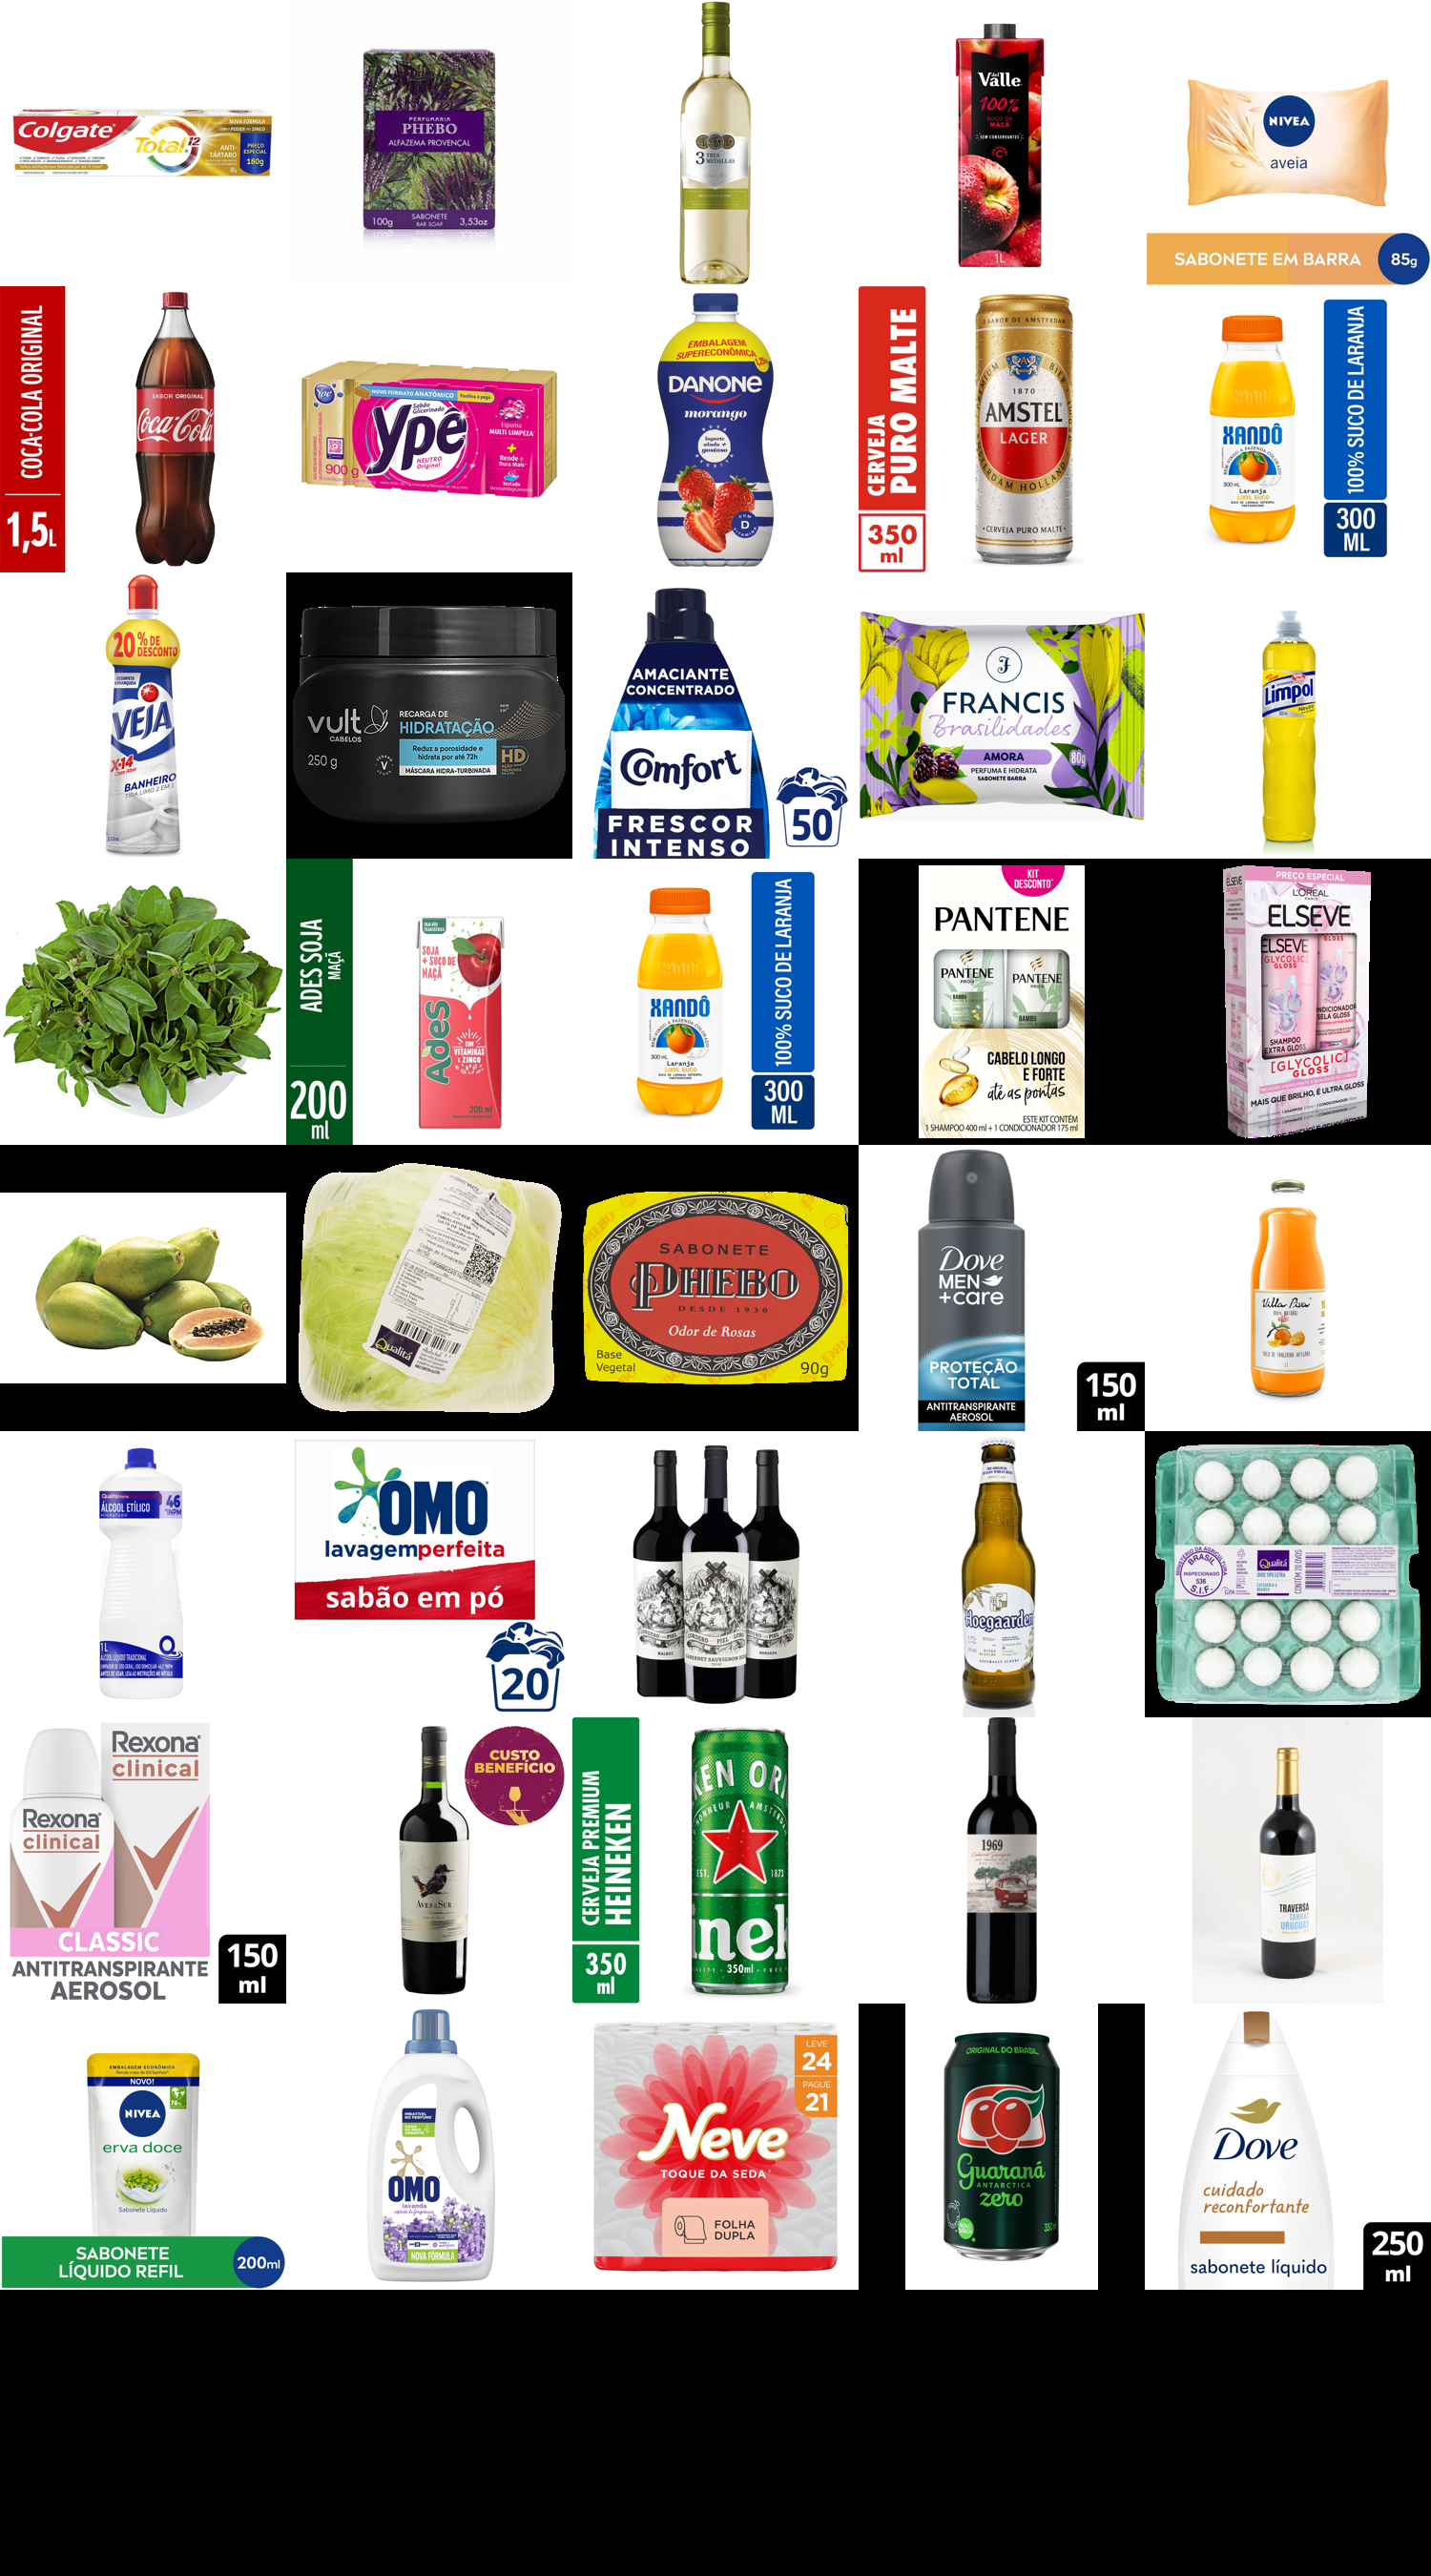

In [34]:
mosaic(best_individual)